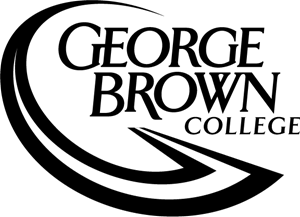

In [ ]:
from IPython.display import Image

# Specify the path to the image in your Downloads folder
image_path = "/Users/marcelobernal/Downloads/George_Brown_College-logo-6ED67F3FAD-seeklogo.com.png"  # Replace with your actual path and image name

# Display the image
Image(filename=image_path)

<div style="text-align: center;">
        <h1>Business Web And Social Media Metrics And Analysis</h1>
    <h1>Data Mining Tasks on Tayko 3 Dataset</h1>
    <h2>Authors:</h2>
    <h3>Hector Andres Prado - 101563686</h3>
    <h3>Indira Hi Cheng Cortés Yip - 101520496</h3>
    <h3>Femi Ardine - 101477766</h3>
    <h3>Sena Erimez - 101451332</h3>
    <h3>Marcelo R Bernal - 101535453</h3>
    <h3>Kenil Gondaliya – 101541104</h3>
    <h2>Submission Date: 31-Oct-2024</h2>


# Table of Contents
1. [Executive Summary](#Executive-Summary)
2. [Business Problem](#Business-Problem)
3. [Data Preprocessing](#Data-Preprocessing)
   - [Handling Missing Values](#Handling-Missing-Values)
   - [Dealing with Outliers](#Dealing-With-Outliers)
   - [Ensuring Data Quality](#Ensuring-Data-Quality)
4. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
5. [Feature Selection/Engineering](#Feature-Selection/Engineering)
   - [Checking Collinearity & Multicollinearity](#Checking-Collinearity-&-Multicollinearity)
   - [One-Hot Encoding Categorical Variables](#One-Hot-Encoding-Categorical-Variables)
   - [Train-Test Split and Scaling](#Train-Test-Split-and-Scaling)
6. [Model Selection](#Model-Selection)
7. [Model Training](#Model-Training)
8. [Pattern Discovery](#Pattern-Discovery)
9. [Model Evaluation](#Model-Evaluation)
   - [a) Performance Plotting and Overfitting Detection](#Performance-Plotting-and-Overfitting-Detection)
   - [b) Logistic Regression on "Spending"](#Logistic-Regression-on-"Spending")
   - [c) Decision Tree Classification on Spending](#Decision-Tree-Classification-on-Spending)
10. [Model Comparison](#Model-Comparison)
11. [Final Conclusion based on the confusion matrics](#Final-Conclusion-based-on-the-confusion-matrics)
12. [Recommendation](#Recommendation)



<div style="text-align: justify;">
    
# Executive Summary

#### This project involves performing comprehensive data mining tasks on the Tayko 3.csv dataset, structured as a Python Notebook for clarity and functionality. The goal is to address a specific business problem by identifying a target variable and conducting various analytical steps to transform raw data into actionable insights. Key stages include data preprocessing, where data quality is enhanced by handling missing values and outliers, followed by exploratory data analysis (EDA) to understand patterns and correlations in the data.

#### Feature engineering will refine the dataset by selecting and creating relevant variables, and the data will be split into training and test sets. Appropriate models, such as linear or logistic regression, will be chosen based on data characteristics and business needs. Training and evaluation processes will validate model performance, utilizing metrics like accuracy and recall to ensure reliable results. Finally, insights gained from this analysis will be interpreted to provide practical recommendations or predictions aligned with the business objective. The chosen model as the recommended model is Multinomial Logistic Regression. The reason is the model has fewer misclassifications as well as achieves higher number of correct classification, which makes it more reliable.


<div style="text-align: justify;">

# Business Problem

#### The main objective of this project is to analyze customer spending behavior using the Tayko3 dataset. We aim to identify key factors that significantly impact spending levels, such as interaction frequency, days since the last update, location, gender, and online ordering preferences. By understanding these variables, the company can design targeted marketing strategies and optimize resources to focus on high-potential customer segments.

#### Through data exploration, we will assess correlations between these factors and spending, eliminating low-correlation variables and addressing multicollinearity to ensure a simplified and interpretable model. Visualizations, including scatter plots and heatmaps, will help reveal trends, showing, for instance, that customers who frequently interact or place online orders tend to spend more.

#### This analysis sets the foundation for customer segmentation based on spending and interaction patterns, enabling the company to enhance marketing effectiveness. By applying and comparing different models such as Multiple Linear Regression, Logistic Regression, and Decision Trees, we aim to accurately classify customers based on spending categories. Logistic Regression, for example, showed a higher accuracy in classifying spending levels, particularly for high-spending customers, providing valuable insights into customer segmentation.

#### In the following sections, we will address this problem using Python.

In [ ]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pylab as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Data Preprocessing

In [ ]:
df = pd.read_csv('Tayko3.csv')

In [ ]:
df.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0


# Handling Missing Values

In [ ]:
# Identifying missing values

df.isnull().sum()

sequence_number         0
US                      0
source_a                0
source_c                0
source_b                0
source_d                0
source_e                0
source_m                0
source_o                0
source_h                0
source_r                0
source_s                0
source_t                0
source_u                0
source_p                0
source_x                0
source_w                0
Freq                    0
last_update_days_ago    0
1st_update_days_ago     0
Web order               0
Gender=male             0
Address_is_res          0
Purchase                0
Spending                0
dtype: int64

No missing value is recorded in the dataset based on the result above.

In [ ]:
# Identifying duplicate sequence_number

duplicate_df = df.duplicated(subset=['sequence_number']).sum()
print(duplicate_df)

0


Identifying if there's any duplicate record by using sequence_number variable. Variable sequence_number is the primary key or unique identifier for the dataset, therefore this variable is used for duplicate checking in case there's a double entry of sequence-number.

Based on the result above, no duplicate entry or sequence in the sequence_number variable.

# Dealing With Outliers

In [ ]:
# Identifying outliers

df.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.62500
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.78261
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,2.00000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,153.00000
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.00000


Based on the descriptive statistics above, the only variable to be checked for outliers is Freq. Variable Freq has mean of 1.4170 and standard deviation of 1.4057, while the maximum value is 15. This indicates that outliers are possible. Remaining variables are either binary or the value of min max std mean shows no potential outliers.

# Ensuring Data Quality

In [ ]:
# Identifying outliers using IQR method

Q1 = df['Freq'].quantile(0.25)
Q3 = df['Freq'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Freq'] < lower_bound) | (df['Freq'] > upper_bound)]

In [ ]:
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print("Outliers detected:")
print(outliers)

Lower Bound: -0.5, Upper Bound: 3.5
Outliers detected:
      sequence_number  US  source_a  source_c  source_b  source_d  source_e  \
8                   9   1         1         0         0         0         0   
13                 14   1         1         0         0         0         0   
43                 44   1         0         0         0         0         0   
52                 53   1         1         0         0         0         0   
56                 57   1         0         0         0         0         1   
...               ...  ..       ...       ...       ...       ...       ...   
1910             1911   1         0         0         0         0         0   
1914             1915   1         0         0         0         0         0   
1928             1929   0         0         0         0         0         1   
1975             1976   1         0         0         0         0         0   
1986             1987   1         0         0         0         0         1 

Based on the result above using IQR method, outliers in Freq variable is either below -0.5 or above 3.5. Since the Freq has no value below 0, therefore the outliers that are detected are the value above 3.5. Value of 4 to 15 in Freq variable are considered as outliers.

In [ ]:
# Removing outliers based on outliers identification result

df_no_outliers = df[(df['Freq'] >= lower_bound) & (df['Freq'] <= upper_bound)]

In [ ]:
print("Original Data Shape:", df.shape)
print("Data Shape after Removing Outliers:", df_no_outliers.shape)

Original Data Shape: (2000, 25)
Data Shape after Removing Outliers: (1886, 25)


Using Freq variable as reference for outliers removal, some of the records with outliers value in Freq are removed from the analysis. Based on the above data shape result, the data shape after removing outliers is (1886, 25), which indicates the new data has 1886 row or records and 25 columns, removing 114 records from the original data.

In [ ]:
data_clean = df_no_outliers
data_clean.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0


# Exploratory Data Analysis EDA

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1886 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   sequence_number       1886 non-null   int64
 1   US                    1886 non-null   int64
 2   source_a              1886 non-null   int64
 3   source_c              1886 non-null   int64
 4   source_b              1886 non-null   int64
 5   source_d              1886 non-null   int64
 6   source_e              1886 non-null   int64
 7   source_m              1886 non-null   int64
 8   source_o              1886 non-null   int64
 9   source_h              1886 non-null   int64
 10  source_r              1886 non-null   int64
 11  source_s              1886 non-null   int64
 12  source_t              1886 non-null   int64
 13  source_u              1886 non-null   int64
 14  source_p              1886 non-null   int64
 15  source_x              1886 non-null   int64
 16  source_w   

### Histograms of Distrubutions of Data

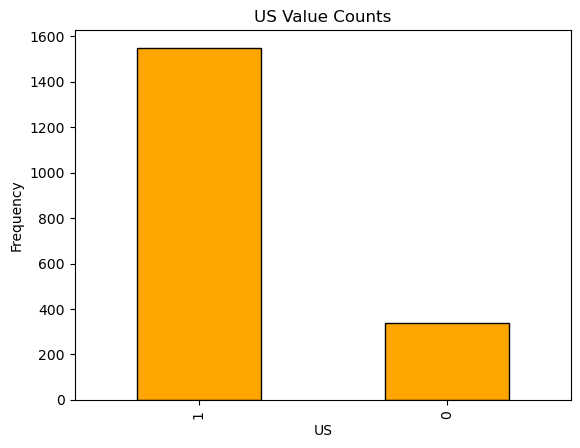

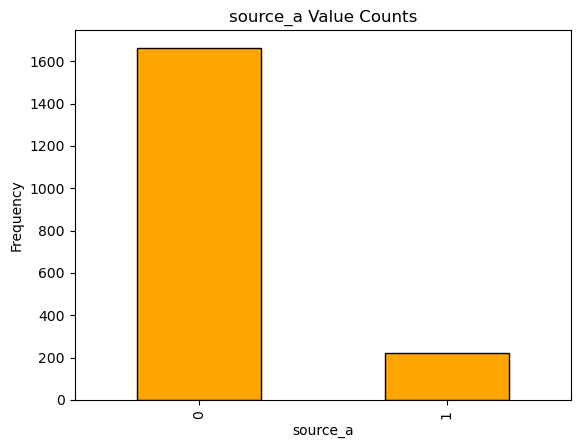

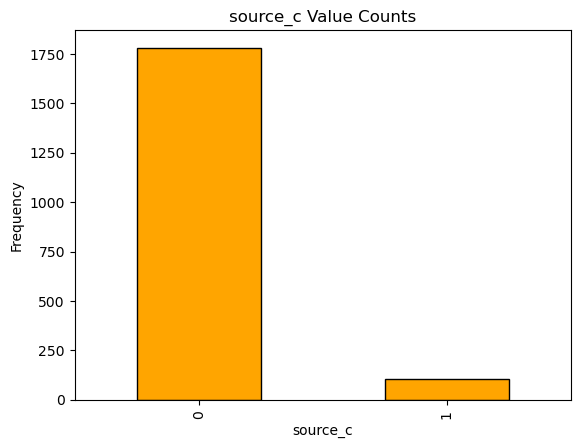

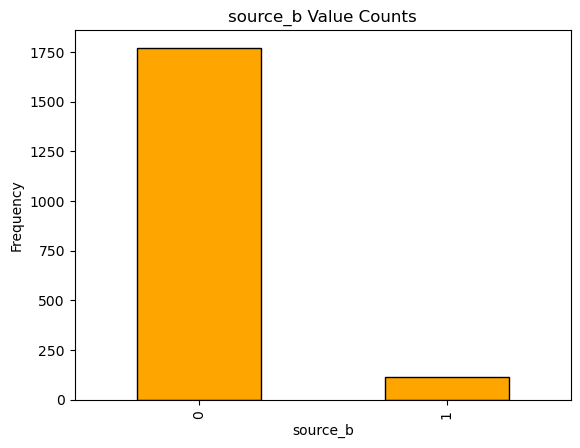

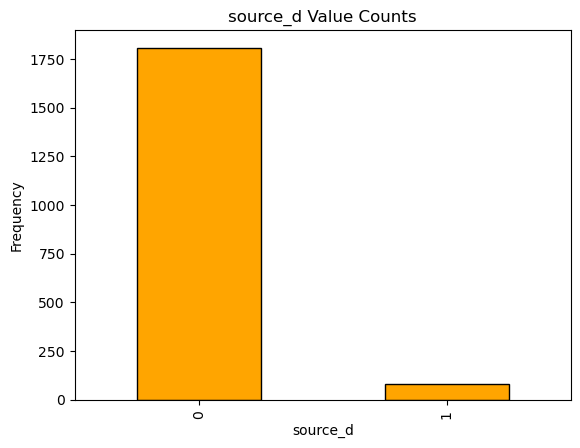

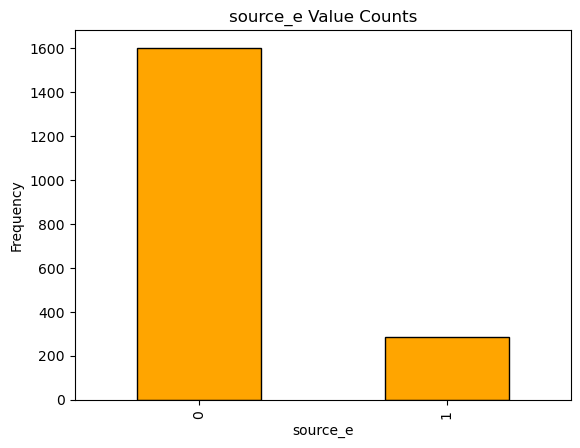

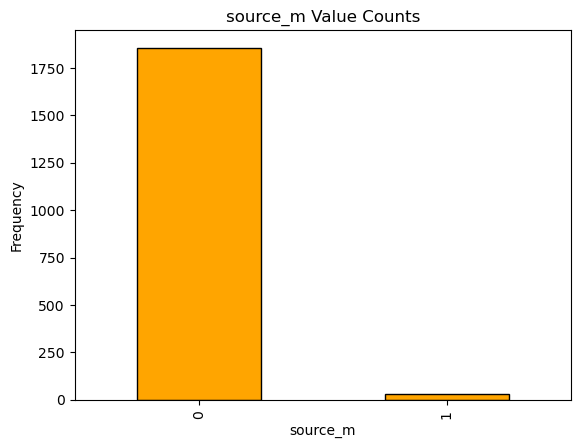

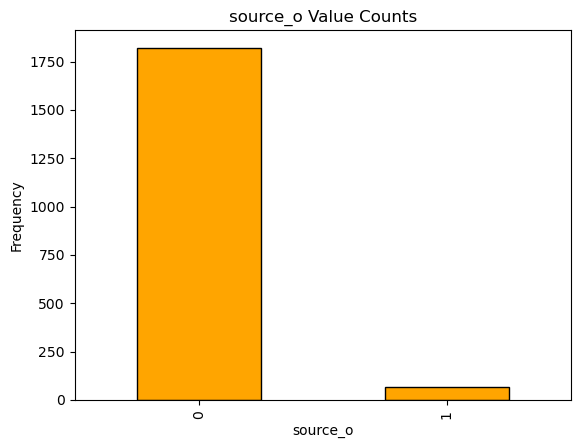

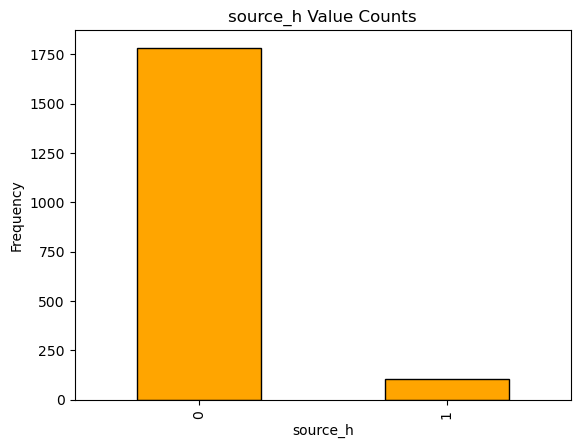

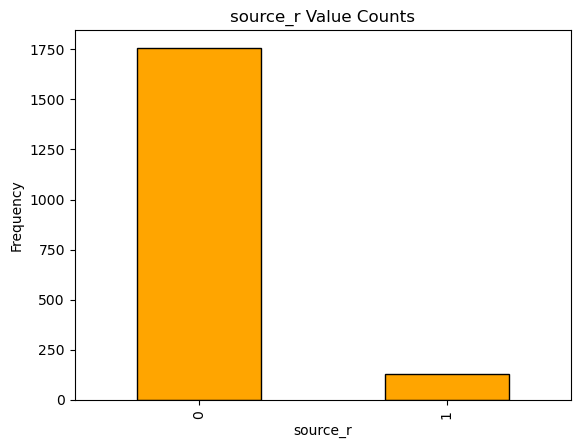

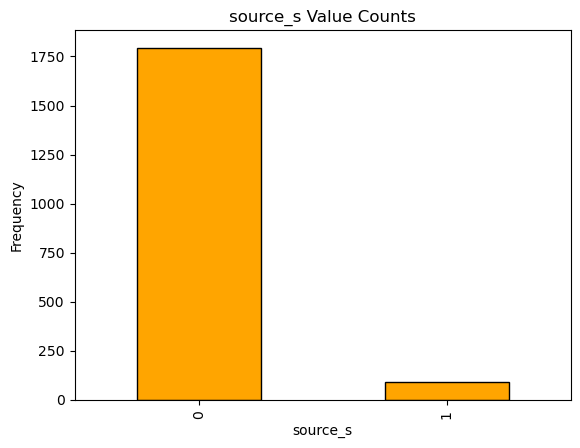

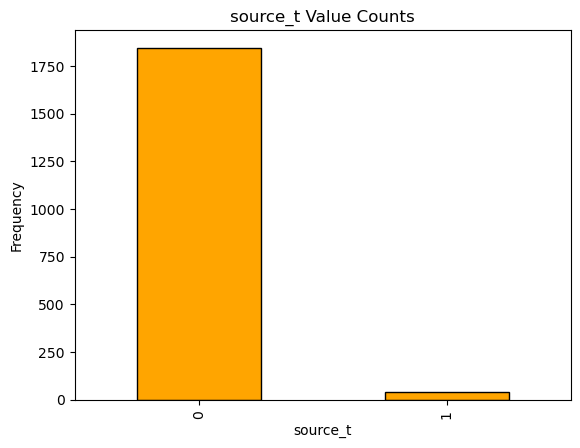

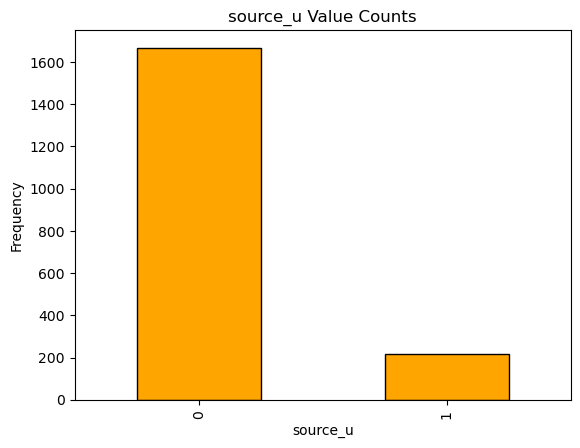

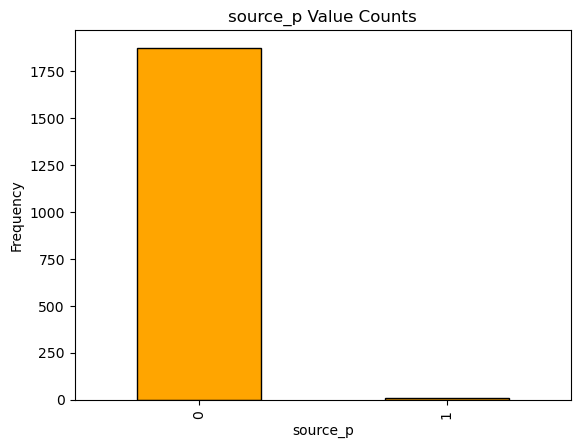

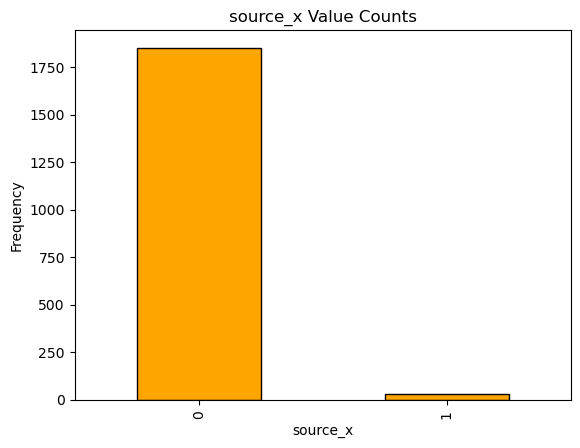

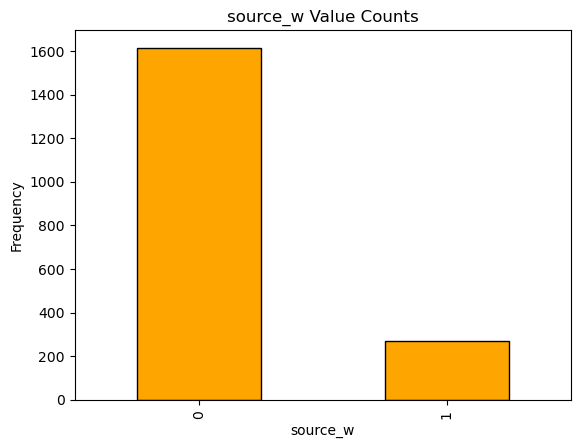

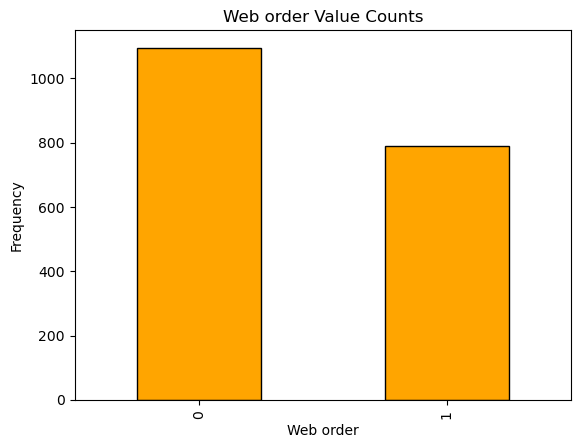

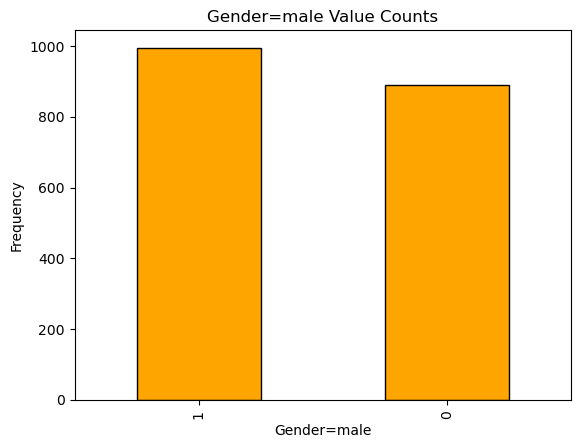

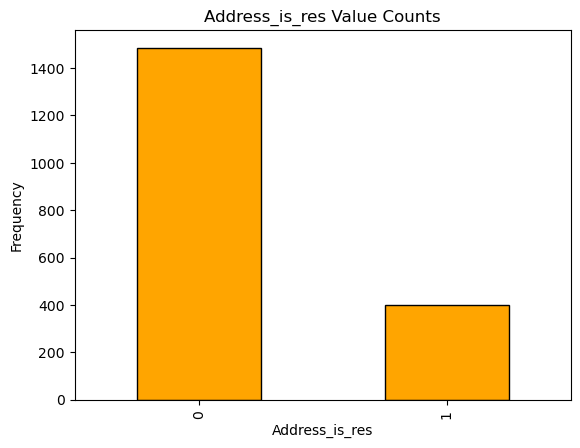

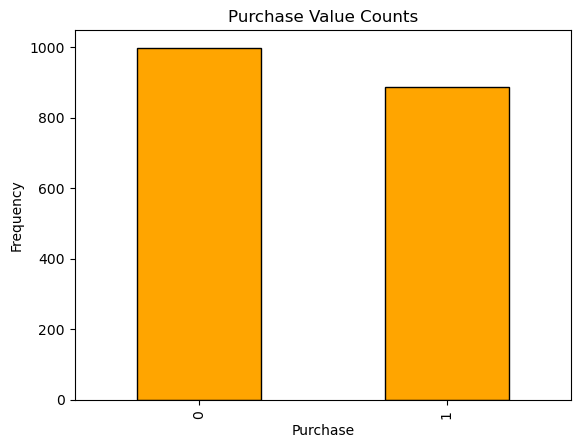

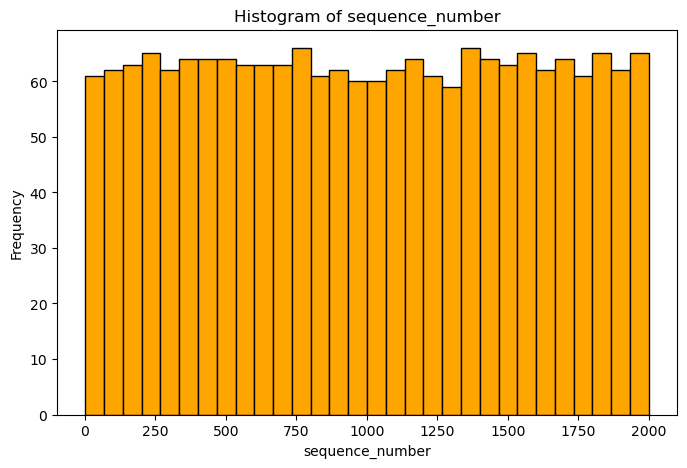

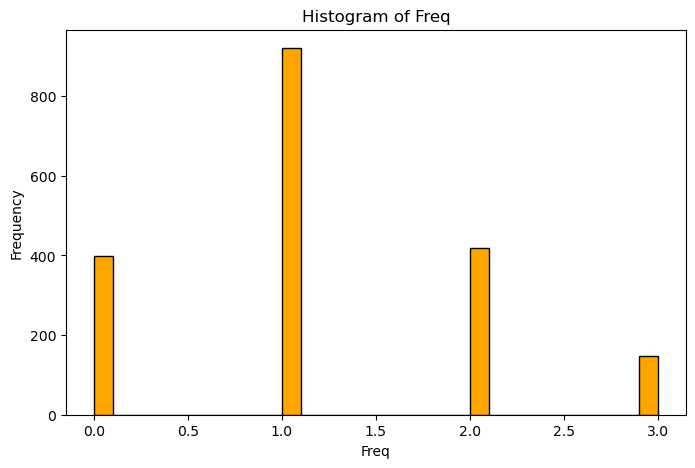

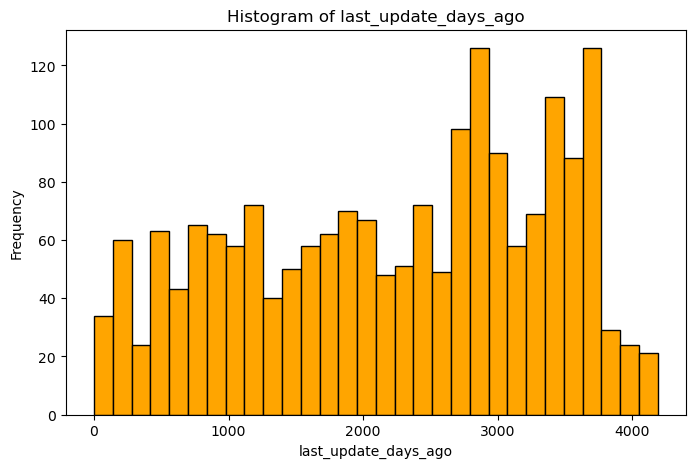

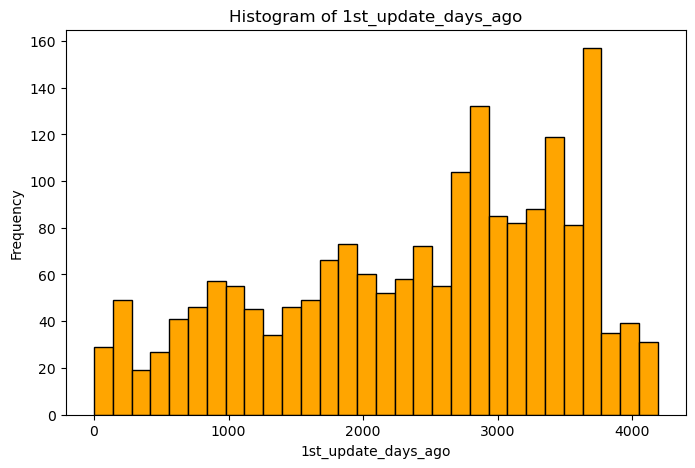

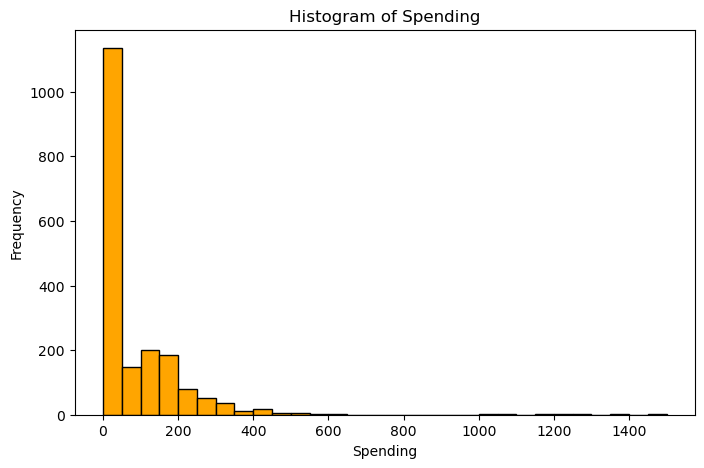

In [ ]:
# Identifying binary and continuous (numeric) columns
binary_columns = [col for col in data_clean.columns if data_clean[col].nunique() == 2]
numeric_columns = [col for col in data_clean.columns if data_clean[col].dtype in ['int64', 'float64'] and col not in binary_columns]

# Bar graph of frequencies for binary (0-1) variables
for column in binary_columns:
    ax = data_clean[column].value_counts().plot(kind='bar', color='orange', edgecolor='black', title=f"{column} Value Counts")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    plt.show()

# Histogram for continuous (numeric) variables
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data_clean[column], bins=30, edgecolor='black', color='orange')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Histograms offer a visual representation of variable distributions within the dataset, making it easier to observe data patterns, identify skewness, and understand the overall distribution of values. This aids in interpreting and analyzing the data effectively before further analysis.

### Correlation Matrix and Scatter Plots

In [ ]:
round(data_clean.corr(),2)

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
sequence_number,1.00,-0.03,-0.01,-0.03,0.03,0.03,0.01,0.03,-0.01,0.02,...,0.00,0.00,-0.04,0.04,0.02,-0.00,0.02,0.00,-0.07,-0.07
US,-0.03,1.00,0.10,0.08,-0.03,0.10,-0.08,0.05,0.00,0.01,...,0.06,-0.20,0.01,0.05,0.07,0.01,0.02,0.02,0.02,-0.02
source_a,-0.01,0.10,1.00,-0.09,-0.09,-0.08,-0.15,-0.05,-0.07,-0.09,...,-0.05,-0.15,0.16,0.14,0.23,0.05,0.03,-0.02,0.21,0.14
source_c,-0.03,0.08,-0.09,1.00,-0.06,-0.05,-0.10,-0.03,-0.05,-0.06,...,-0.03,-0.10,0.01,-0.17,-0.18,0.02,0.00,-0.05,-0.06,-0.06
source_b,0.03,-0.03,-0.09,-0.06,1.00,-0.05,-0.11,-0.03,-0.05,-0.06,...,-0.03,-0.10,-0.09,0.26,0.25,-0.01,0.00,-0.09,-0.10,-0.06
source_d,0.03,0.10,-0.08,-0.05,-0.05,1.00,-0.09,-0.03,-0.04,-0.05,...,-0.03,-0.09,0.08,0.14,0.15,-0.01,0.01,-0.05,0.03,0.01
source_e,0.01,-0.08,-0.15,-0.10,-0.11,-0.09,1.00,-0.05,-0.08,-0.10,...,-0.06,-0.17,-0.07,0.08,0.06,-0.04,-0.02,-0.06,-0.05,-0.04
source_m,0.03,0.05,-0.05,-0.03,-0.03,-0.03,-0.05,1.00,-0.02,-0.03,...,-0.02,-0.05,-0.02,-0.01,-0.03,-0.02,0.02,-0.00,0.02,-0.01
source_o,-0.01,0.00,-0.07,-0.05,-0.05,-0.04,-0.08,-0.02,1.00,-0.05,...,-0.03,-0.08,-0.18,0.19,0.23,-0.01,0.00,-0.05,-0.11,-0.08
source_h,0.02,0.01,-0.09,-0.06,-0.06,-0.05,-0.10,-0.03,-0.05,1.00,...,-0.03,-0.10,0.25,-0.15,-0.17,-0.05,-0.04,0.42,-0.18,-0.10


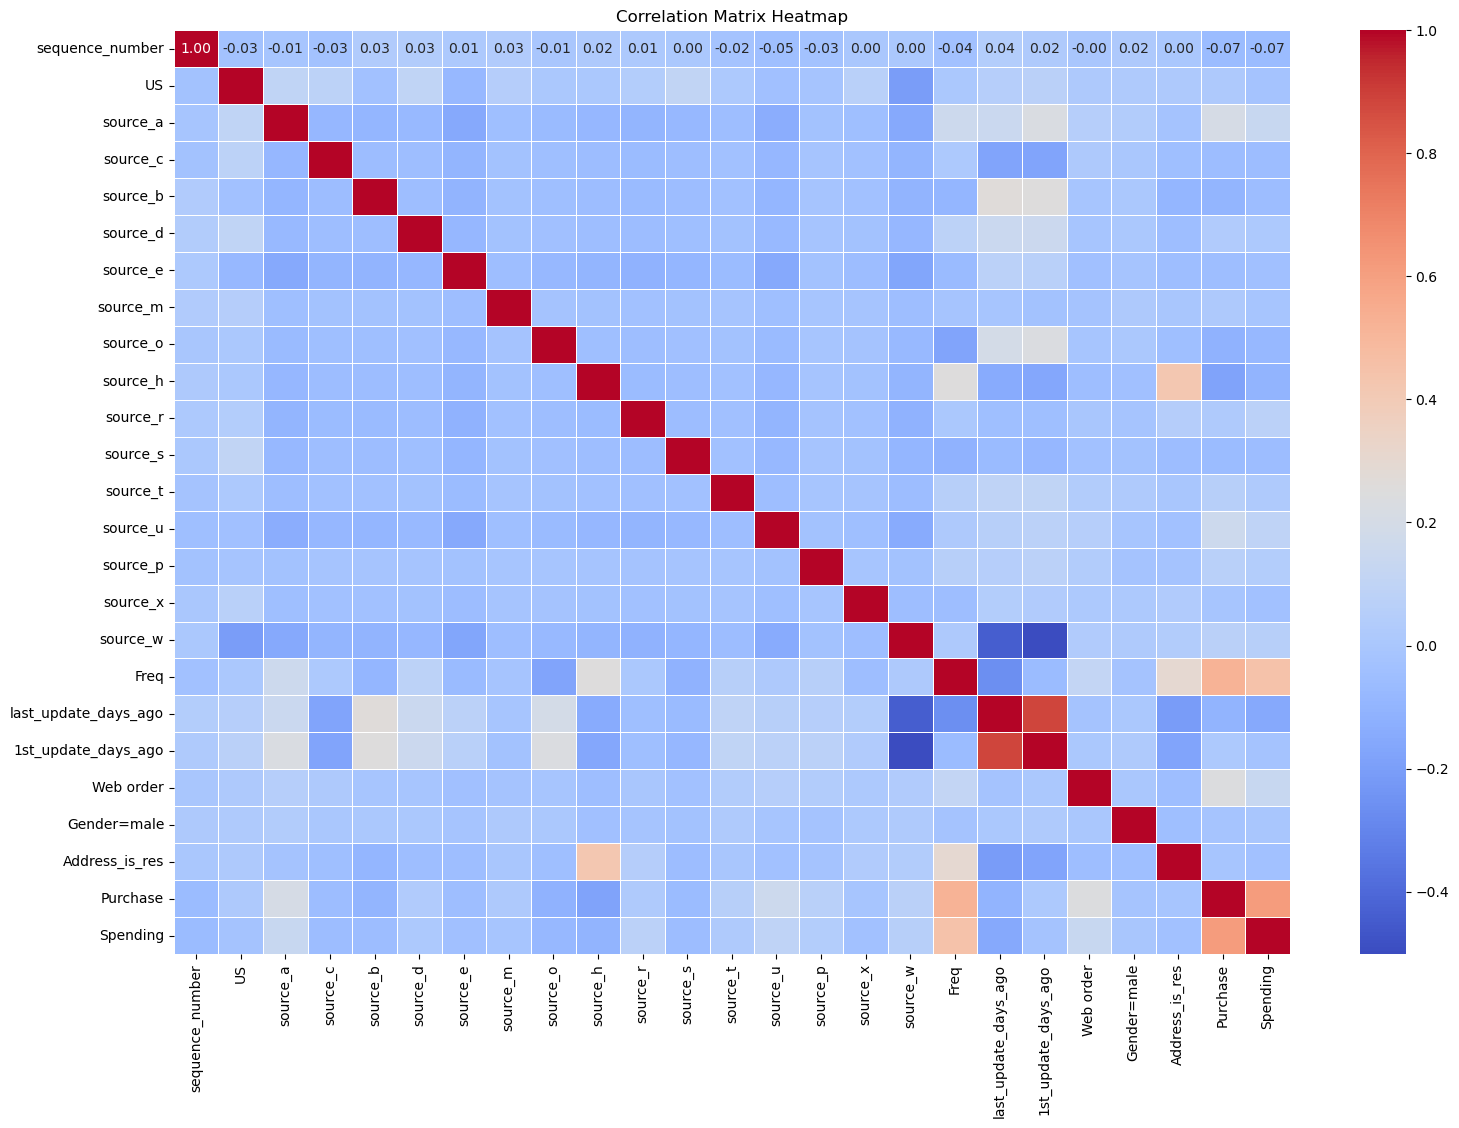

In [ ]:
# Correlation Matrix
corr_matrix = data_clean.corr(numeric_only = True)
corr_matrix

plt.figure(figsize=(18, 12))

# Correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Visualization
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Positive Correlations
Based on the results we can draw from the correlation matrix, we observe a high positive correlation of 0.89 between last_update_days_ago and 1st_update_days_ago. This could suggest that updates are possibly done at a certain frequency. Secondly, there is a moderate correlation of 0.26 between Freq and last_update_days_ago, which may imply that customers who visit the website frequently or have a higher purchase frequency (Freq) update their information more often. Additionally, we see a positive correlation of 0.52 between Freq and Purchase, suggesting that frequent website visitors or those with a high purchase frequency tend to have a purchasing behavior linked to this frequency.
#### Negative Correlations
Examining the negative correlations, there is a -0.44 negative correlation between last_update_days_ago and Freq. This may indicate that customers who haven't updated their information in a long time tend to shop or visit the website less frequently. Furthermore, there is a significant negative correlation of -0.50 between 1st_update_days_ago and Freq. This could mean that customers who last updated their information a long time ago tend to visit the website or make purchases less frequently.
#### Correlations on Dummy Variables
Dummy Variables: "US", "source_a", "source_b","source_d","source_e","source_m","source_o","source_h","source_r","source_s","source_t","source_u","source_p","source_x","source_w","Web order","Gender=male","address_is_res","purchase".

When examining the correlation matrix, it is important to interpret dummy variables differently because they take values of 0 or 1, which limits their variation. However, since we observe that these variables show low correlations with continuous variables in the matrix, we cannot make meaningful interpretations based on these correlations.

### Scatter Plots for Correlated Variables

Horizontal relationships between variables were visually analyzed using scotter plots for correlated variable pairs. This provides a clear picture of the distribution of weakness, whether positive, negative or weak.

C:\Users\senae\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\senae\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\senae\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\senae\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

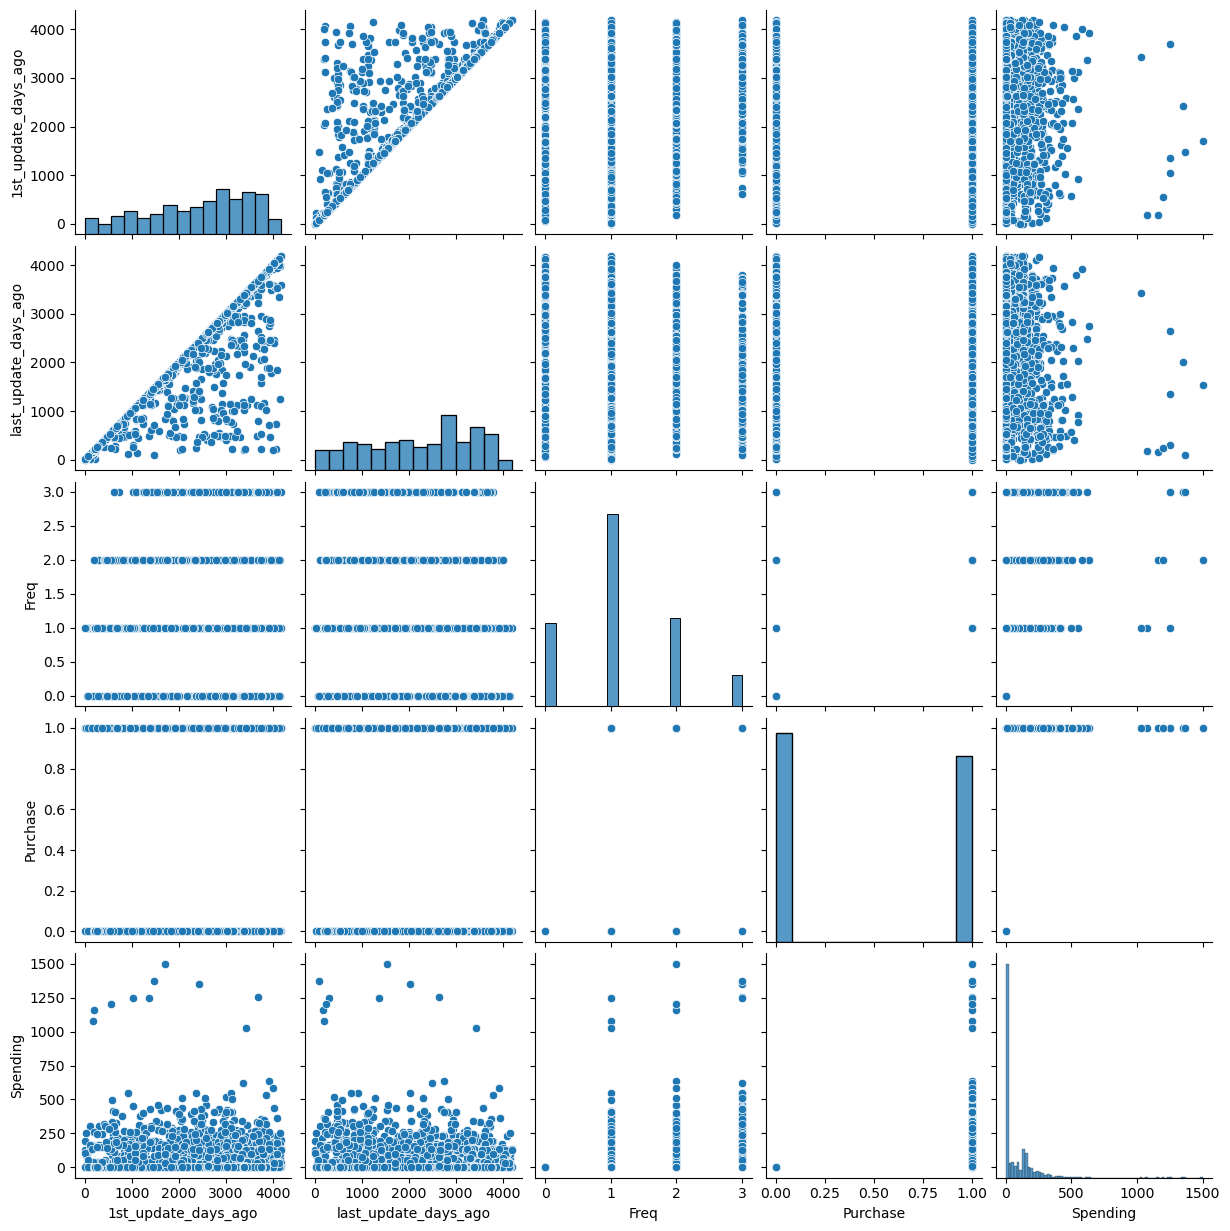

                      1st_update_days_ago  last_update_days_ago      Freq  \
1st_update_days_ago              1.000000              0.885605 -0.063199   
last_update_days_ago             0.885605              1.000000 -0.264945   
Freq                            -0.063199             -0.264945  1.000000   
Purchase                         0.012810             -0.102928  0.522137   
Spending                        -0.025002             -0.152347  0.448005   

                      Purchase  Spending  
1st_update_days_ago   0.012810 -0.025002  
last_update_days_ago -0.102928 -0.152347  
Freq                  0.522137  0.448005  
Purchase              1.000000  0.615979  
Spending              0.615979  1.000000  


In [ ]:
# Selecting relevant columns for exploration
df_subset = data_clean[['1st_update_days_ago', 'last_update_days_ago', 'Freq', 'Purchase','Spending']]

# Pairplot to visualize the relationships between variables
sns.pairplot(df_subset)
plt.show()

# Display the correlation matrix
correlation_matrix = df_subset.corr()
print(correlation_matrix)

last_update_days_ago vs 1st_update_days_ago: When we examine the distribution between these two variables, there is a greater concentration at higher values. A possible inference we can make is that some customers update their profiles/information more frequently at specific intervals.

Purchase vs Spending: We observe that the spending variable has a wide distribution. While some customers have made high expenditures, others have made lower ones.

Freq vs last_update_days_ago: Looking at the freq variable, we see that the distribution is mostly concentrated at lower values, meaning that, in general, customers do not visit the site frequently or have low shopping frequency. When we examine it alongside last_update_days_ago, we can infer that those who update more frequently tend to have a higher freq.

Freq vs Purchase: The frequency of making a purchase is higher among those who visit the site. However, there are also visitors who have not made any purchases.

last_update_days_ago vs Freq- 1st_update_days_ago vs Freq:There are wide ranges in the distributions, indicating that some customers have not visited or made a purchase for an extended period

# Feature Selection/Engineering

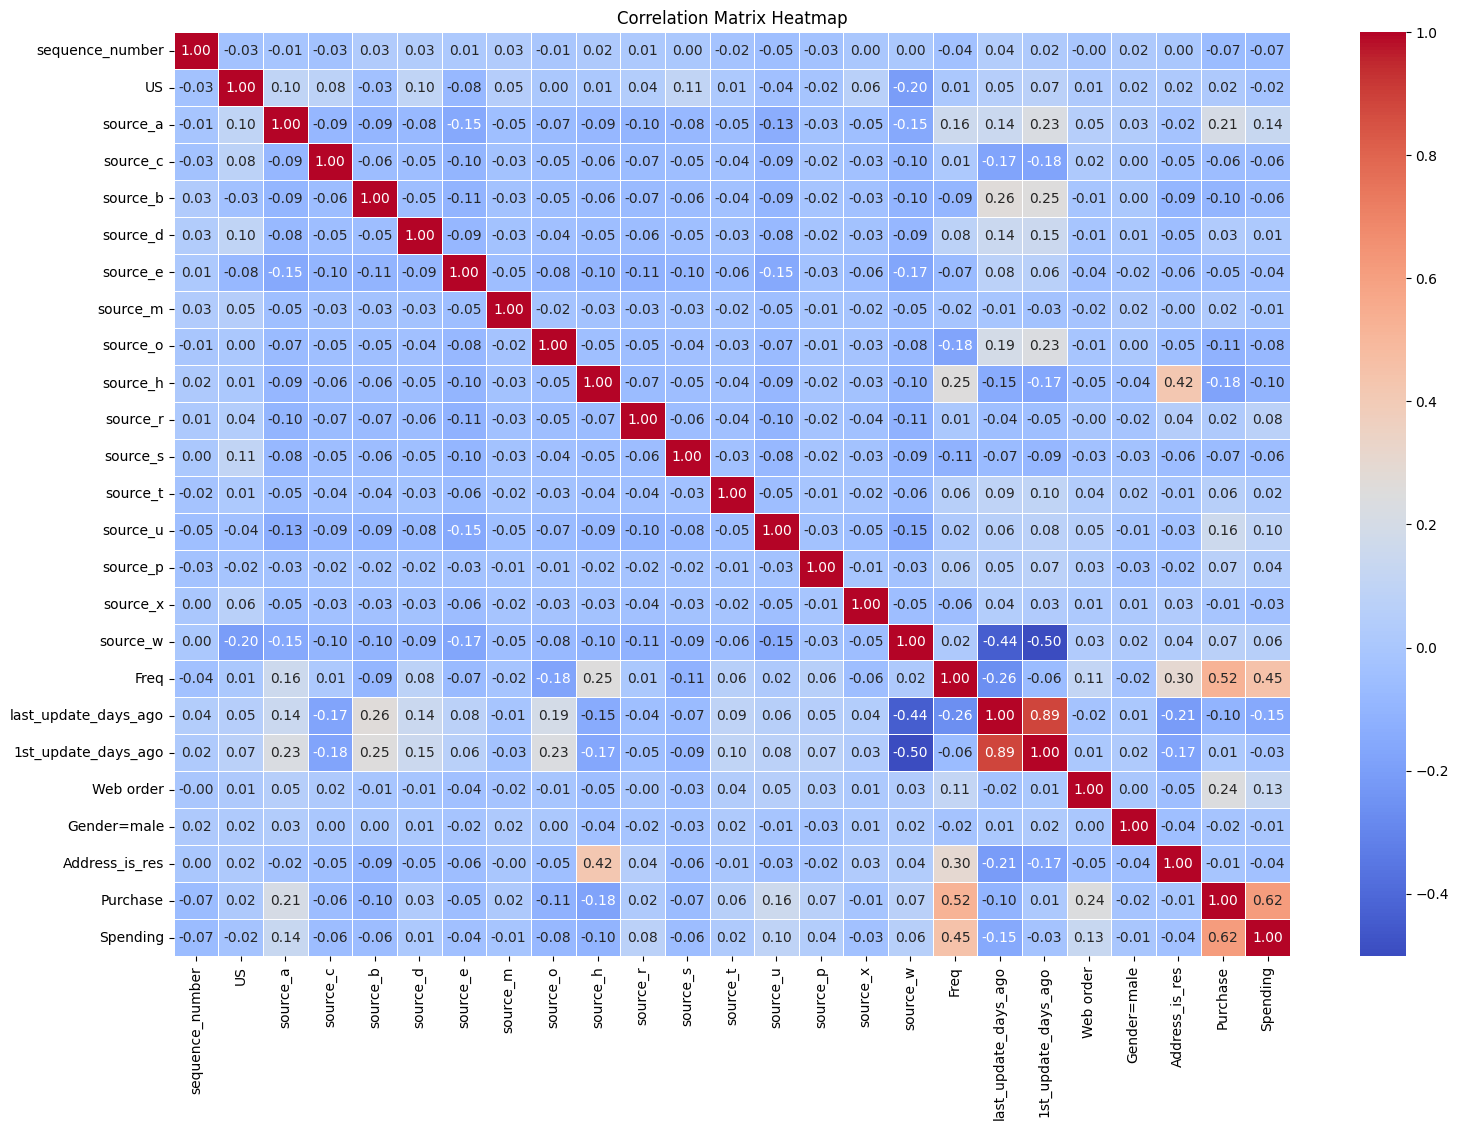

In [ ]:
# Correlation Matrix
corr_matrix = data_clean.corr(numeric_only = True)
corr_matrix

plt.figure(figsize=(18, 12))

# Correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Visualization
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation matrix and heatmap helps us find variables that are either strongly related or barely related to Spending. We’ll focus on variables with high correlations because they likely explain Spending well, and we’ll remove those with very low correlations (below 0.05) since they add little value. Dropping these low-correlation variables makes the model simpler, cleaner, and easier to interpret, laying the groundwork for further feature selection.

# Collinearity by Analyzing Correlation Matrix

In [ ]:
# Calculate correlations with Spending
correlations = data_clean.corr()['Spending'].abs()

# Settin the limit < 0.05
low_corr_features = correlations[correlations < 0.05].index.tolist()

# Dropping low-correlation features
tayko_df_dropped_low_corr = data_clean.drop(columns=low_corr_features)

print("Dropped low-correlation features:", low_corr_features)

Dropped low-correlation features: ['US', 'source_d', 'source_e', 'source_m', 'source_t', 'source_p', 'source_x', '1st_update_days_ago', 'Gender=male', 'Address_is_res']


We decided to drop the following low-correlation variables: US, source_d, source_e, source_m, source_t, source_p, source_x, '1st_update_days_ago', Gender=male, and Address_is_res. Addition of these variables that will be removed, sequence_number will be removed as well since this variable is a unique ID or primary key to the record. These variables showed very low correlations with Spending, below our threshold of 0.05, meaning they have minimal association with the dependent variable. Retaining them would add unnecessary complexity and noise to the model without significantly contributing to its predictive power. By removing these low-impact variables, we streamline the model, improve its interpretability, and focus on features more likely to explain or predict Spending effectively. This reduction is a crucial first step to ensure our model is both efficient and insightful.

# Multicollinearity by appliying Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Calculate Variance Inflation Factor
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Excluding 'Spending' when calculating VIF
vif_df = calculate_vif(data_clean.drop(columns=['Spending']))

# Show variables with high VIF
print("High VIF features:\n", vif_df[vif_df["VIF"] > 10])

If we use the data_clean (before removing several variables based on the collinearity result), the high VIF values for last_update_days_ago (23.02) and 1st_update_days_ago (32.05) indicate that these variables are highly related to each other, meaning they essentially capture the same information. Including both could make the model unstable and harder to interpret. To make the model simpler and more reliable, it would be best to keep only one of these variables. Align with the result of collinearity, variable to be removed is "1st_update_days_ago", therefore this variable will be removed due to high VIF as well.

# One-Hot Encoding Categorical Variables

In [ ]:
print(tayko_df_dropped_low_corr.columns)

Index(['sequence_number', 'source_a', 'source_c', 'source_b', 'source_o',
       'source_h', 'source_r', 'source_s', 'source_u', 'source_w', 'Freq',
       'last_update_days_ago', 'Web order', 'Purchase', 'Spending'],
      dtype='object')


In [ ]:
tayko_df_dropped_high_corr = tayko_df_dropped_low_corr.drop(columns=['sequence_number'])

print("Remaining features after dropping high VIF variable '1st_update_days_ago':")
print(tayko_df_dropped_high_corr.columns)

Remaining features after dropping high VIF variable '1st_update_days_ago':
Index(['source_a', 'source_c', 'source_b', 'source_o', 'source_h', 'source_r',
       'source_s', 'source_u', 'source_w', 'Freq', 'last_update_days_ago',
       'Web order', 'Purchase', 'Spending'],
      dtype='object')


In [ ]:
tayko_df_dropped_high_corr.head()

,source_a,source_c,source_b,source_o,source_h,source_r,source_s,source_u,source_w,Freq,last_update_days_ago,Web order,Purchase,Spending
0,0,0,1,0,0,0,0,0,0,2,3662,1,1,128
1,0,0,0,0,0,0,0,0,0,0,2900,1,0,0
2,0,0,0,0,0,0,0,0,0,2,3883,0,1,127
3,0,1,0,0,0,0,0,0,0,1,829,0,0,0
4,0,1,0,0,0,0,0,0,0,1,869,0,0,0


### One-hot encode. There are not categorical variables to be converted into

# Train-Test Split and Scaling

# Train-test Split

In [ ]:
# Filter the data to include only rows where 'Spending' is greater than 0
tayko_df_filtered = tayko_df_dropped_high_corr[tayko_df_dropped_high_corr['Spending'] > 0]

# Define independent (X) and dependent (y) variables after feature selection and filtering
X = tayko_df_filtered.drop(columns=['Spending', 'Purchase'])  # Drop 'Spending' (target) and 'Purchase' columns
y = tayko_df_filtered['Spending']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In our dataset, the train-test split is essential to ensure our model's reliability in predicting Spending. By dividing the data, we can train the model on the training set to capture general patterns, then validate its performance on the test set, which acts as unseen data. This approach prevents overfitting, where the model might otherwise learn details specific to the training data that don’t apply broadly. Testing on new data provides an honest measure of the model’s accuracy and ensures it generalizes well.

# Scaling the Training and Test Dataset

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In our dataset, scaling the training and test sets is crucial to ensure that all features contribute fairly to predicting Spending. Since variables in different units or scales can bias the model by making some features appear more influential, scaling standardizes each feature’s range to a similar scale.

# Verifying Scaling

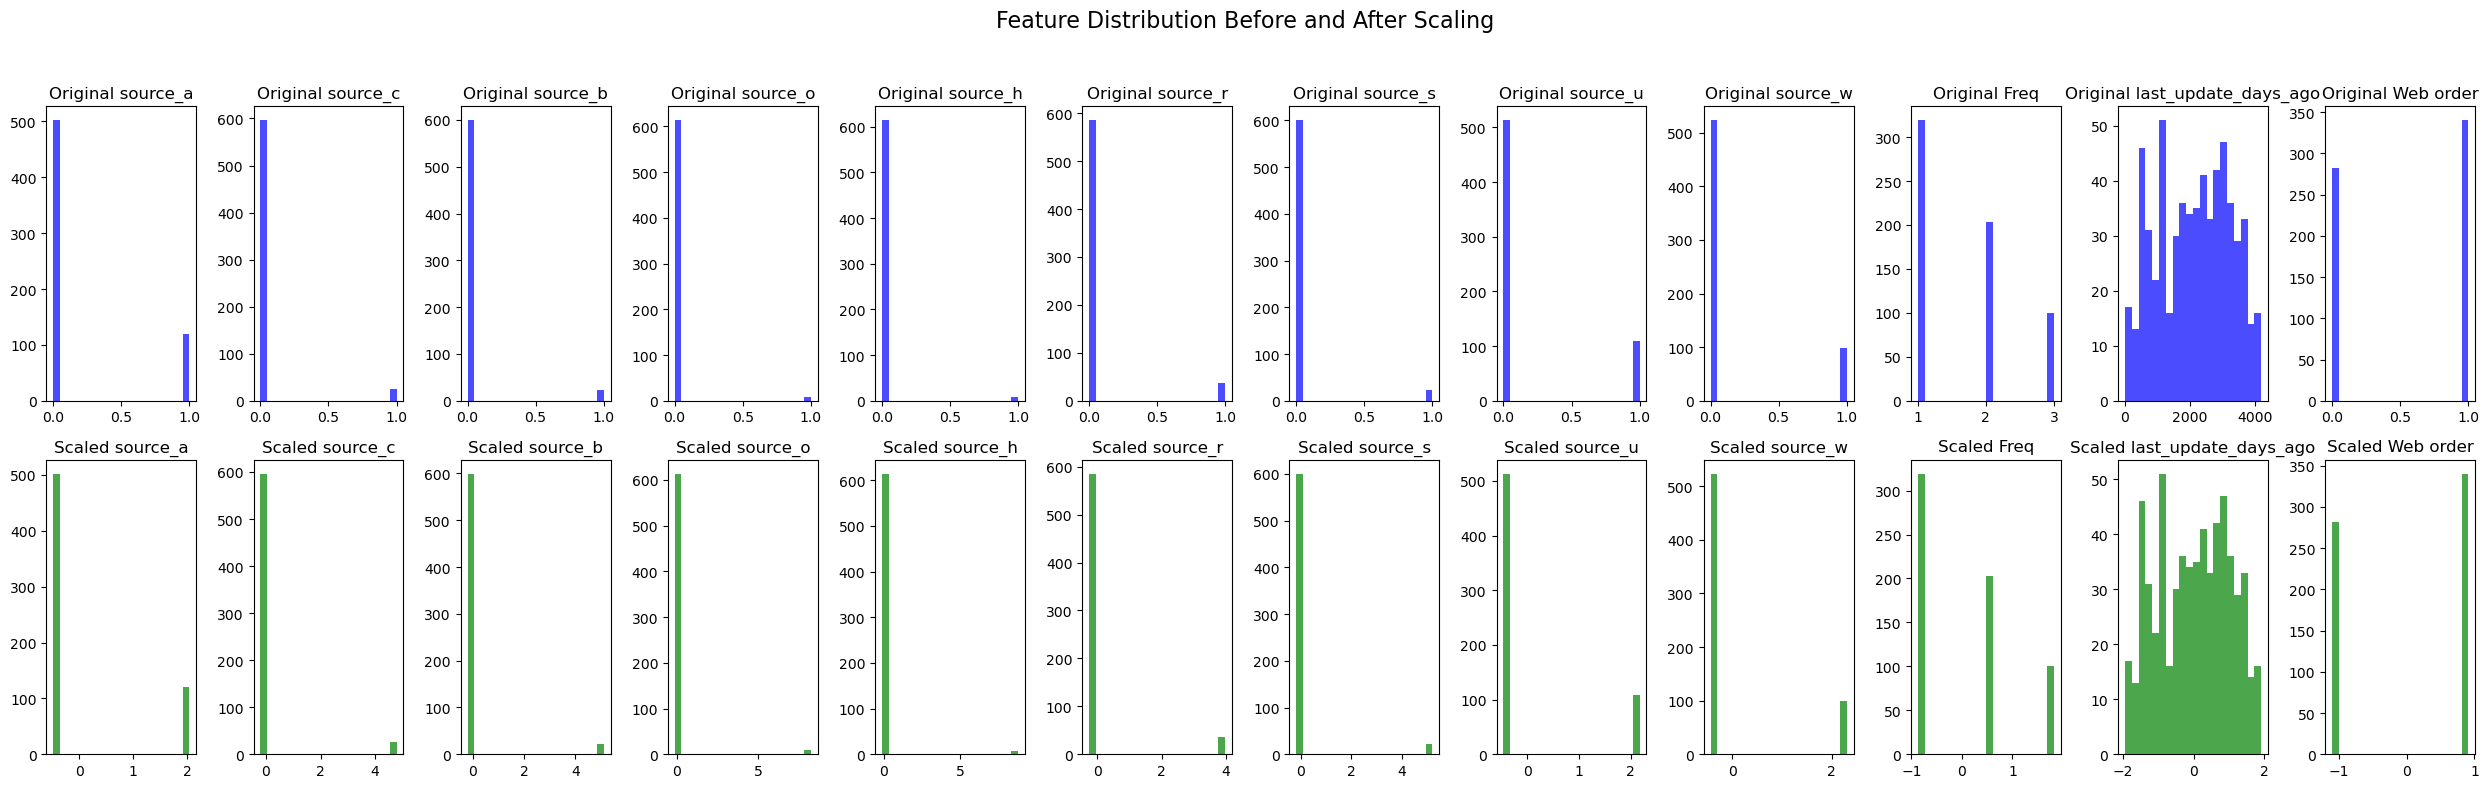

In [ ]:
# Convert scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Plot histograms to compare original vs. scaled features in training data
fig, axes = plt.subplots(nrows=2, ncols=len(X_train.columns), figsize=(25, 8))
fig.suptitle('Feature Distribution Before and After Scaling', fontsize=16)

# Plot original features
for i, col in enumerate(X_train.columns):
    # Original feature (unscaled)
    axes[0, i].hist(X_train[col], bins=20, color='blue', alpha=0.7)
    axes[0, i].set_title(f'Original {col}')

    # Scaled feature
    axes[1, i].hist(X_train_scaled_df[col], bins=20, color='green', alpha=0.7)
    axes[1, i].set_title(f'Scaled {col}')

# Visualization
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

For features with continuous values, like Freq and last_update_days_ago, scaling worked as expected: their distributions are now centered around zero. This shows that the scaling adjusted these features to have an average near zero and a consistent range.

For binary features like source_a, source_b, and Web order, scaling didn’t change much, which is normal. Since these features only have values of 0 and 1, scaling just adjusted them slightly without affecting their basic 0/1 structure.

# Model Selection

# Regression Model

Since the goal is to analyze spending (a continuous target), linear regression is the chosen model. This approach is appropriate for estimating the relationship between spending and predictor variables.

# Model Training

In [ ]:
#Model Training with Scaled Data
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Check the columns of X to confirm 'Purchase' is deleted
print("Columns in X:", X.columns)

Columns in X: Index(['source_a', 'source_c', 'source_b', 'source_o', 'source_h', 'source_r',
       'source_s', 'source_u', 'source_w', 'Freq', 'last_update_days_ago',
       'Web order'],
      dtype='object')


# Pattern Discovery

In [ ]:
# Pattern Discovery and Evaluation with Cross-Validation

# Predictions on the test set
y_reg_pred = linear_model.predict(X_test_scaled)

# Mean Squared Error and Mean Absolute Error
mse = mean_squared_error(y_test, y_reg_pred)
mae = mean_absolute_error(y_test, y_reg_pred)
print(f'Linear Model - Mean Squared Error: {mse}')
print(f'Linear Model - Mean Absolute Error: {mae}')

# Cross-validation for model stability
cross_val_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE: {-np.mean(cross_val_scores)}')

Linear Model - Mean Squared Error: 14013.676026443201
Linear Model - Mean Absolute Error: 85.4845827904676
Cross-validated MSE: 26627.08308745976


The linear regression model is trained on the scaled data. During training, the model identifies patterns in spending based on the input features, allowing it to capture how each factor (e.g., interaction frequency or online ordering) contributes to spending behavior.

Based on the results, these are the observations

*Mean Squared Error (MSE):*  MSE of 14013.68 indicates the model's typical error magnitude when predicting spending values. A high MSE can suggest that some variability in spending is not well captured by the model or that certain influential patterns might be more complex than the model can fully capture.

*Mean Absolute Error (MAE):*  MAE of 85.48 means that predictions are about $85 away from the true spending values.

*Cross-validated MSE:*  MSE of 26627.08 is notably higher than the MSE on the test set, which could indicate that the model’s performance varies across different subsets of the data. This difference suggests there might be patterns or relationships in some subsets that the model captures better than in others.

# Model Evaluation

In [ ]:
# Fit the multiple linear regression model using stepwise regression on the training set
model = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()

# Get the summary of the model to understand the effect of each predictor on spending
print(model.summary())

# Predict on the test set to evaluate the model
test_predictions = model.predict(sm.add_constant(X_test_scaled))

# Calculate evaluation metrics for model accuracy
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
print('Multiple Linear Regression - Stepwise Regression Metrics:')
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     6.576
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           4.00e-11
Time:                        16:22:10   Log-Likelihood:                -4025.8
No. Observations:                 622   AIC:                             8078.
Df Residuals:                     609   BIC:                             8135.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        171.0579      6.344     26.962      0.0

**R-squared:** The model explains only 11.5% of the variance in "Spending," suggesting that most of the variation in spending is not accounted for by the features in the model. This low R-squared might mean that there are other influential factors not included in your data or that the relationship between the predictors and spending is not well captured by a linear model.

**Adjusted R-squared:** Value adjusts for the number of predictors in the model and is slightly lower than the R-squared. It indicates that additional predictors don’t substantially improve the model, and that many predictors might not be contributing meaningfully.

**F-statistic (6.576, with p-value < 0.0001):** Value tests whether at least one predictor variable has a significant effect on spending. The low p-value indicates that the model as a whole has statistically significant predictive power, even though the overall fit (R-squared) is low.

**Overall**
Low R-squared and non-significant predictors suggest that either additional relevant variables are missing or that spending might follow a more complex, possibly non-linear pattern.

To explore alternative models (e.g., decision trees) that might better capture complex relationships in spending behavior.


# Performance Plotting and Overfitting Detection

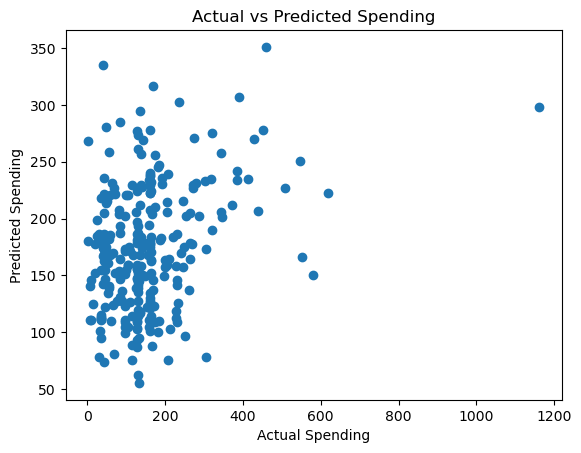

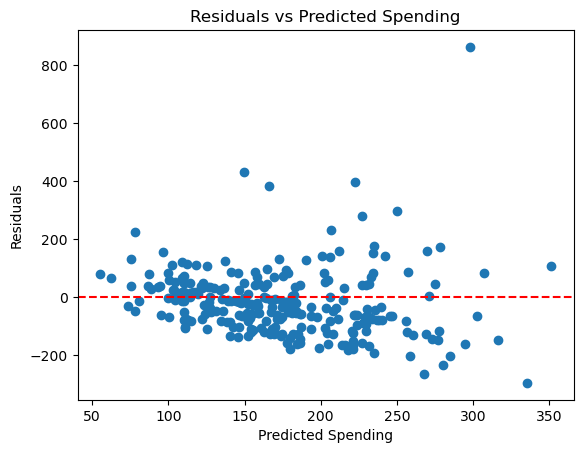

In [ ]:
# Overfitting Detection and Visual Evaluation for Linear Regression

# Actual vs Predicted Spending
plt.scatter(y_test, y_reg_pred)  # Using y_test and y_reg_pred for actual vs. predicted
plt.xlabel('Actual Spending')
plt.ylabel('Predicted Spending')
plt.title('Actual vs Predicted Spending')
plt.show()

# Residuals Plot
residuals = y_test - y_reg_pred  # Corrected to y_test for actual values
plt.scatter(y_reg_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Spending')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Spending')
plt.show()


Actual vs. Predicted Spending Plot: This scatter plot helps visually assess how well the model's predictions match actual spending values. A strong linear pattern would indicate accurate predictions. Residuals Plot: The residuals plot (errors between actual and predicted values) is another check for model quality. Ideally, residuals should show no pattern (be randomly scattered), suggesting that the model accurately captures the relationship without bias.

**Actual vs Predicted Spending Plot**
This scatter plot shows the relationship between the actual values of spending (on the x-axis) and the predicted values from the model (on the y-axis).
Interpretation:

In this plot, there is a lot of scatter, and many predictions are quite far from the actual values, especially for larger spending amounts. This indicates that the model struggles to capture the higher values accurately, suggesting underfitting.

The model performs better in predicting lower values of spending but does not generalize well across the entire range of data.

**Residuals vs Predicted Spending Plot**
This plot shows residuals (errors between actual and predicted values) on the y-axis against the predicted values on the x-axis. The red dashed line at zero represents perfect predictions.
Interpretation:

The plot shows a pattern where residuals are more spread out (and positive) for higher predicted values of spending. This pattern suggests that the model might systematically underestimate spending for higher values, indicating a possible bias.


Based on the results seen in the regression model we are considering to try more flexible models such as decision trees to capture the potential non-linear relationships in the data.

# Logistic Regression on "Spending"

**Filter Out Zero Spending**

In [ ]:
# Remove rows where Spending is zero
data = df[df['Spending'] > 0]


**Categorize "Spending" into 4 Levels**

Use pd.qcut to split the remaining Spending values into 4 levels.

In [ ]:
# Create 4 categorical bins for 'Spending': Low, Medium-Low, Medium-High, and High
data['Spending_Category'] = pd.qcut(data['Spending'], q=4, labels=[1, 2, 3, 4])

# Display the result
print(data[['Spending', 'Spending_Category']].head())


    Spending Spending_Category
0        128                 2
2        127                 2
8        489                 4
9        174                 3
13      1416                 4


C:\Users\Indir\AppData\Local\Temp\ipykernel_44988\616751908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Spending_Category'] = pd.qcut(data['Spending'], q=4, labels=[1, 2, 3, 4])


Here:

1 = Low spending

2 = Medium-Low spending

3 = Medium-High spending

4 = High spending

This will divide the Spending column into four equal-frequency bins, excluding any rows where Spending was zero

**Define Features and Target**

Now that Spending_Category is a categorical target, set it as y and drop Spending from X.

In [ ]:
# Define features (X) and the new categorical target (y)
X = data.drop(columns=['Spending', 'Spending_Category'])  # Drop both Spending and Spending_Category columns if not features
y = data['Spending_Category']

**Split the Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Standardize the Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Train the Multinomial Logistic Regression Model**

Since we're dealing with multiple classes, we’ll use the multinomial option in the LogisticRegression model.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the logistic regression model for multinomial (multi-class) logistic regression
logistic_model = LogisticRegression(multi_class='multinomial', max_iter=1000, solver='lbfgs')
logistic_model.fit(X_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict the categories on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Multinomial Logistic Regression Results:")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Multinomial Logistic Regression Results:
Accuracy: 0.4318936877076412
Confusion Matrix:
[[37 15 16  5]
 [25 27 14 11]
 [24 12 24 11]
 [15 10 13 42]]
Classification Report:
              precision    recall  f1-score   support

           1       0.37      0.51      0.43        73
           2       0.42      0.35      0.38        77
           3       0.36      0.34      0.35        71
           4       0.61      0.53      0.56        80

    accuracy                           0.43       301
   macro avg       0.44      0.43      0.43       301
weighted avg       0.44      0.43      0.43       301



**Make Predictions and Evaluate the Model**

# Decision Tree Classification on Spending

**Train the Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Make Predictions and Evaluate the Model**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Decision Tree Results:")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Decision Tree Results:
Accuracy: 0.40863787375415284
Confusion Matrix:
[[31 10 18 14]
 [23 22 19 13]
 [14 14 28 15]
 [17  5 16 42]]
Classification Report:
              precision    recall  f1-score   support

           1       0.36      0.42      0.39        73
           2       0.43      0.29      0.34        77
           3       0.35      0.39      0.37        71
           4       0.50      0.53      0.51        80

    accuracy                           0.41       301
   macro avg       0.41      0.41      0.40       301
weighted avg       0.41      0.41      0.41       301



**Visualize the Decision Tree**

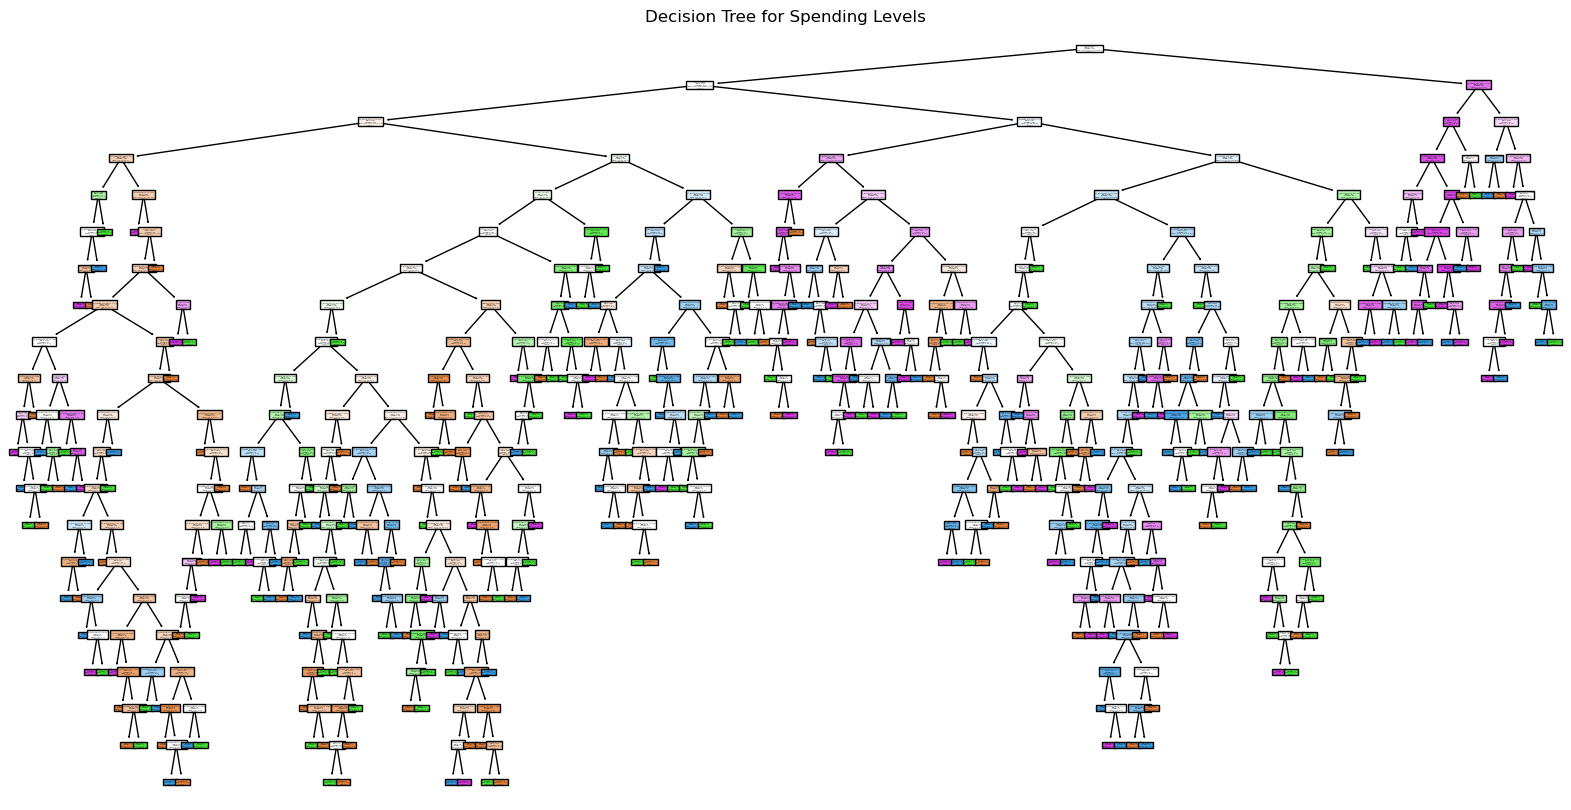

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=['1', '2', '3', '4'], filled=True)
plt.title("Decision Tree for Spending Levels")
plt.show()


**Generate Confusion Matrices for Each Model**

In [ ]:
y_pred_linear = tree_model.predict(X_test)

# Continue with your confusion matrix calculation:
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
print("Confusion Matrix - Multiple Linear Regression (Binary/Categorical Conversion):")
print(conf_matrix_linear)

y_pred_logistic = logistic_model.predict(X_test)

# Confusion Matrix for Logistic Regression (Multinomial)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print("\nConfusion Matrix - Logistic Regression (Multinomial):")
print(conf_matrix_logistic)

y_pred_tree = tree_model.predict(X_test)

# Confusion Matrix for Decision Tree Classifier
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("\nConfusion Matrix - Decision Tree Classifier:")
print(conf_matrix_tree)

Confusion Matrix - Multiple Linear Regression (Binary/Categorical Conversion):
[[31 10 18 14]
 [23 22 19 13]
 [14 14 28 15]
 [17  5 16 42]]

Confusion Matrix - Logistic Regression (Multinomial):
[[37 15 16  5]
 [25 27 14 11]
 [24 12 24 11]
 [15 10 13 42]]

Confusion Matrix - Decision Tree Classifier:
[[31 10 18 14]
 [23 22 19 13]
 [14 14 28 15]
 [17  5 16 42]]


## Model Comparison

True Positives: Logistic Regression has the highest True Positives in the first two categories, indicating better correct classifications in those categories.

Misclassifications: Logistic Regression generally has fewer misclassifications compared to the other models, especially in the last row (fourth category), where it has fewer False Positives and False Negatives.

## Final Conclusion based on the confusion matrics

Logistic Regression (Multinomial) has the highest overall True Positives and generally fewer misclassifications. It outperforms Multiple Linear Regression and Decision Tree Classifier in identifying the correct categories, particularly in the first and second categories.

Decision Tree Classifier and Multiple Linear Regression (Binary/Categorical Conversion) show identical confusion matrices, suggesting they perform similarly, but with more misclassifications than Logistic Regression.

## Recommendation

Logistic Regression (Multinomial) is the best model for classifying Spending into multiple categories. It achieves a higher number of correct classifications with fewer misclassifications, making it more reliable for this dataset.